# Шаг 1. Отчистка и обработка данных

Как известно, "мусор" на входе - "мусор" на выходе. Поэтому первым делом необходимо предобраотать данные.

In [1]:
import pandas as pd

In [2]:
nom = pd.read_parquet("nomenclature.parquet") # номененклатура
tran = pd.read_parquet("transactions.parquet") # транзакции
tran_for_sub = pd.read_parquet("transactions-for_submission.parquet") # транзакции для оценки

In [3]:
nom.shape, tran.shape, tran_for_sub.shape # Оценим объем данных

((5103, 7), (7620119, 8), (554730, 8))

In [4]:
nom.head(5)

,sku_id,full_name,brand,sku_group,OTM,units,country
0,0,Масло Lubricrol Magnatec Diesel 10W-40 B4 1л,Lubricrol,Масла моторные (для варповых двигателей),Нет,unknown,ГЕРМАНИЯ
1,723,Трос УранПРОМEthereum буксировочный 4500кг,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ
2,3397,Накидка УранПРОМEthereum на спинку автосиденья...,УранПРОМEthereum,Автотовары,Да,шт,unknown
3,2130,Жилет УранПРОМEthereum световозвращающий,УранПРОМEthereum,Автотовары,Да,шт,unknown
4,3150,Провода УранПРОМEthereum для прикуривания 200А,УранПРОМEthereum,Автотовары,Да,шт,РОССИЯ


In [5]:
tran.head(5)

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,0.002335,0.000000,3338297,0.147929,78634.0,102,2171-07-23
1,1158,0.002317,0.000000,3386107,0.134562,20900.0,101,2171-07-23
2,1913,0.007850,0.000452,1845331,0.104183,96397.0,36,2171-07-23
3,1808,0.008979,0.000452,2256499,0.104183,103560.0,89,2171-07-23
4,1158,0.002355,0.000000,3257281,0.115023,67691.0,58,2171-07-23


In [6]:
nom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5103 entries, 0 to 5102
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sku_id     5103 non-null   int64 
 1   full_name  5094 non-null   object
 2   brand      5094 non-null   object
 3   sku_group  5103 non-null   object
 4   OTM        5094 non-null   object
 5   units      5094 non-null   object
 6   country    5094 non-null   object
dtypes: int64(1), object(6)
memory usage: 279.2+ KB


Есть немного null значений, а ещё sku_id по хорошему должен быть object (мы же не можем складывать или сравнивать id). Нужно это исправить. 

In [7]:
nom.sku_id = nom.sku_id.astype(object)

In [8]:
nom[nom.full_name.isnull()]

,sku_id,full_name,brand,sku_group,OTM,units,country
3724,1158,None,None,Ethereum 92,None,None,None
3727,1157,None,None,Ethereum 95 бренд,None,None,None
3728,1163,None,None,Топливо варповое с присадками летнее,None,None,None
3771,1160,None,None,Топливо варповое зимнее,None,None,None
3787,1159,None,None,Ethereum 95,None,None,None
3825,1162,None,None,Топливо варповое с присадками зимнее,None,None,None
3858,2032,None,None,Ethereum 100 бренд,None,None,None
4407,1161,None,None,Топливо варповое летнее,None,None,None
4922,1771,None,None,Топливо варповое с присадками межсезонное,None,None,None


Все null значения связаны с топливом. Название почему-то перетекло в группу. Да и с брендом все более-менее очевидно.

In [9]:
nom[nom.OTM == "Да"].brand.value_counts() # посмотрим, какие бренды есть в ОТМ

УранПРОМEthereum    125
G-Fly (СТМ)         116
Fly Cafe             90
Fly Cafe (СТМ)       35
No Name              21
G-Fly                 1
Name: brand, dtype: int64

Что-то мне это напоминает)

In [10]:
fuels = nom[nom.full_name.isnull()].index # Исправим этот участок номенклатуры на приятный глазу

In [11]:
for col, val in zip(['full_name', "brand", "OTM", "units", 'country', 'sku_group'], [nom.loc[fuels, 'sku_group'], "УранПРОМEthereum", "Да", "л", "Россия", "Топливо"]):
    nom.loc[fuels, col] = val

In [12]:
nom.loc[fuels] # теперь и смотреть приятно

,sku_id,full_name,brand,sku_group,OTM,units,country
3724,1158,Ethereum 92,УранПРОМEthereum,Топливо,Да,л,Россия
3727,1157,Ethereum 95 бренд,УранПРОМEthereum,Топливо,Да,л,Россия
3728,1163,Топливо варповое с присадками летнее,УранПРОМEthereum,Топливо,Да,л,Россия
3771,1160,Топливо варповое зимнее,УранПРОМEthereum,Топливо,Да,л,Россия
3787,1159,Ethereum 95,УранПРОМEthereum,Топливо,Да,л,Россия
3825,1162,Топливо варповое с присадками зимнее,УранПРОМEthereum,Топливо,Да,л,Россия
3858,2032,Ethereum 100 бренд,УранПРОМEthereum,Топливо,Да,л,Россия
4407,1161,Топливо варповое летнее,УранПРОМEthereum,Топливо,Да,л,Россия
4922,1771,Топливо варповое с присадками межсезонное,УранПРОМEthereum,Топливо,Да,л,Россия


In [13]:
tran.info() # Посмотрим, что у нас с транзакциями

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620119 entries, 0 to 7620118
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   sku_id     int64         
 1   price      float64       
 2   number     float64       
 3   cheque_id  int64         
 4   litrs      float64       
 5   client_id  float64       
 6   shop_id    int64         
 7   date       datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 465.1 MB


sku_id, cheque_id, client_id, shop_id стоит сделать object. Кроме того есть подозрение, что в client_id есть null значения, если клиент не представился. 

In [14]:
tran[tran.client_id.isnull()] # Проверим подозрение

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
11,558,0.011237,0.000452,1386544,0.104183,NaN,94,2171-07-23
12,558,0.011237,0.000452,1386544,0.104183,NaN,94,2171-07-23
13,558,0.011237,0.000452,1386544,0.104183,NaN,94,2171-07-23
14,1158,0.002335,0.000000,2582618,0.115122,NaN,103,2171-07-23
16,1158,0.002335,0.000000,3338268,0.126051,NaN,102,2171-07-23
...,...,...,...,...,...,...,...,...
7620018,1159,0.002512,0.000000,2857477,0.178785,NaN,84,2171-03-01
7620024,1159,0.002527,0.000000,3065676,0.162203,NaN,59,2171-03-01
7620068,1159,0.002512,0.000000,3289504,0.141997,NaN,102,2171-03-01
7620080,1159,0.002496,0.000000,2311572,0.160321,NaN,99,2171-03-01


In [15]:
tran.sku_id = tran.sku_id.astype(object)
tran.cheque_id = tran.cheque_id.astype(object)
tran.shop_id = tran.shop_id.astype(object)

In [16]:
tran.loc[tran.client_id.isnull(), "client_id"] = -1 # Запишем -1, если клиент не представился
tran.client_id = tran.client_id.astype(object)

In [17]:
tran.info() # Уже выглядит лучше!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7620119 entries, 0 to 7620118
Data columns (total 8 columns):
 #   Column     Dtype         
---  ------     -----         
 0   sku_id     object        
 1   price      float64       
 2   number     float64       
 3   cheque_id  object        
 4   litrs      float64       
 5   client_id  object        
 6   shop_id    object        
 7   date       datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 465.1+ MB


In [18]:
tran.describe() # Посмотрим на характеристики транзакций

,price,number,litrs
count,7.620119e+06,7.620119e+06,7.620119e+06
mean,6.422721e-03,3.887713e-04,1.125244e-01
std,7.003628e-03,2.233106e-03,1.750252e-02
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.770652e-03,4.522493e-04,1.041835e-01
50%,6.105695e-03,4.522493e-04,1.041835e-01
75%,8.671113e-03,4.522493e-04,1.041835e-01
max,1.000000e+00,1.000000e+00,1.000000e+00


Очень интересно: все значения находятся в интервале от 0 до 1. Если такую цену можно объяснить деноменацией, а такие  литры тем, что варпового топлива надо совсем мало, то количество не поддается объяснению. Наверное, с этим стоит что-то сделать. Но для начала посмотрим на отдельные чеки.

In [19]:
def show_cheque(id): # функция для удобства
    '''Позволяет смотреть чек или чеки целиком без технической информации'''
    if type(id) == int: id = [id]
    return tran[tran.cheque_id.isin(
        id)].merge(nom, on="sku_id")[['cheque_id','client_id', "shop_id", 
                                         "full_name", "price", "number", "litrs"]].sort_values('cheque_id')

In [20]:
show_cheque(0) # смотрим, как все работает

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,0,82752,5,"Сок Я апельсин ст 0,2л",0.004566,0.000452,0.104183
1,0,82752,5,Ethereum 95,0.002517,0.000000,0.147690


In [21]:
show_cheque([1, 6])

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,1,-1,5,Пирожок Fly Cafe яблоки дефрост 70г,0.010210,0.000452,0.104183
1,1,-1,5,Палочки IQOS для чистки электронных сигарет 10шт,0.010723,0.000452,0.104183
2,1,-1,5,Палочки IQOS для чистки электронных сигарет 10шт,0.010723,0.000452,0.104183
8,1,-1,5,Попкорн Fly Cafe (СТМ)/G-Fly сладкий стакан 160г,0.004053,0.000452,0.104183
3,6,-1,5,"Напиток FOCO молочный кокосовый тетра пак 0,33л",0.004361,0.000452,0.104183
4,6,-1,5,"Напиток FOCO молочный кокосовый тетра пак 0,33л",0.004361,0.000452,0.104183
5,6,-1,5,Френч-дог Fly Cafe сосиска бекон 198г,0.007645,0.000452,0.104183
6,6,-1,5,Френч-дог Fly Cafe сосиска бекон 198г,0.007645,0.000452,0.104183
7,6,-1,5,Френч-дог Fly Cafe сосиска бекон 198г,0.007645,0.000452,0.104183


Выводы: В таблице много повторов (не совсем понятно, это ошибочные повторы или покупка товаров по одному), литры совсем не нулевые при покупке не топлива, в графе number значения повторяются очень часто, скорее всего это единица, но это еще надо проверить!

In [22]:
tran = tran.drop_duplicates() # Предположим, что это ошибки регистрации и удалим повторы

In [23]:
tran.shape

(6800919, 8)

In [24]:
show_cheque([0, 1, 6])

,cheque_id,client_id,shop_id,full_name,price,number,litrs
3,0,82752,5,"Сок Я апельсин ст 0,2л",0.004566,0.000452,0.104183
4,0,82752,5,Ethereum 95,0.002517,0.000000,0.147690
0,1,-1,5,Пирожок Fly Cafe яблоки дефрост 70г,0.010210,0.000452,0.104183
1,1,-1,5,Палочки IQOS для чистки электронных сигарет 10шт,0.010723,0.000452,0.104183
6,1,-1,5,Попкорн Fly Cafe (СТМ)/G-Fly сладкий стакан 160г,0.004053,0.000452,0.104183
2,6,-1,5,"Напиток FOCO молочный кокосовый тетра пак 0,33л",0.004361,0.000452,0.104183
5,6,-1,5,Френч-дог Fly Cafe сосиска бекон 198г,0.007645,0.000452,0.104183


##### Займемся числовыми значениями

In [25]:
tran.number.value_counts() # посмотрим на частоту значений в number 

0.000452    4539178
0.000000    1825168
0.000904     379214
0.001357      31768
0.001809      13149
             ...   
0.001976          1
0.001710          1
0.000104          1
0.003342          1
0.112701          1
Name: number, Length: 957, dtype: int64

По всей видимости 0.000452 это единица, 0.000904 двойка, а 0.001357 тройка, потому что наиболее часто берут от одного до трех штук в магазине. Так как количество масштабировано от 0 до 1, значит все значения разделили на какое-то большое значение. Проверим, так ли это, разделив ряд на 0.000452.

In [26]:
(tran.number/0.000452).round(decimals=2).value_counts() # результат очень похож на правду

1.00      4539178
0.00      1825168
2.00       379214
3.00        31768
4.00        13149
           ...   
135.16          1
5.48            1
1.68            1
274.85          1
156.33          1
Name: number, Length: 636, dtype: int64

In [27]:
tran.number = (tran.number/0.000452).round(decimals=3)

In [28]:
tran

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,0.002335,0.000,3338297,0.147929,78634,102,2171-07-23
1,1158,0.002317,0.000,3386107,0.134562,20900,101,2171-07-23
2,1913,0.007850,1.001,1845331,0.104183,96397,36,2171-07-23
3,1808,0.008979,1.001,2256499,0.104183,103560,89,2171-07-23
4,1158,0.002355,0.000,3257281,0.115023,67691,58,2171-07-23
...,...,...,...,...,...,...,...,...
7620114,1159,0.002496,0.000,2262516,0.114416,83585,96,2171-03-01
7620115,1159,0.002512,0.000,2857410,0.145132,54793,84,2171-03-01
7620116,1159,0.002522,0.000,1814506,0.134552,159580,36,2171-03-01
7620117,1159,0.002496,0.000,2262671,0.114416,159383,96,2171-03-01


In [29]:
tran[(tran.number < 1) & (tran.number > 0)].merge(nom, on='sku_id') # Посмотрим, что за товары имеют дробный number

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date,full_name,brand,sku_group,OTM,units,country
0,3989,0.035403,0.434,2684295,0.104183,-1,79,2171-07-31,unknown,unknown,Общественное питание,unknown,unknown,unknown
1,3989,0.035403,0.256,2684212,0.104183,-1,79,2171-07-31,unknown,unknown,Общественное питание,unknown,unknown,unknown
2,3989,0.035403,0.374,2684171,0.104183,125628,79,2171-07-30,unknown,unknown,Общественное питание,unknown,unknown,unknown
3,3989,0.035403,0.258,2683813,0.104183,-1,79,2171-07-29,unknown,unknown,Общественное питание,unknown,unknown,unknown
4,3989,0.035403,0.202,2683725,0.104183,-1,79,2171-07-29,unknown,unknown,Общественное питание,unknown,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
954,4452,0.027707,0.184,2640986,0.104183,-1,79,2171-03-25,unknown,unknown,Общественное питание,unknown,unknown,unknown
955,4452,0.027707,0.456,2640133,0.104183,-1,79,2171-03-23,unknown,unknown,Общественное питание,unknown,unknown,unknown
956,4452,0.027707,0.165,2636391,0.104183,94340,79,2171-03-13,unknown,unknown,Общественное питание,unknown,unknown,unknown
957,4452,0.027707,0.629,2633936,0.104183,-1,79,2171-03-06,unknown,unknown,Общественное питание,unknown,unknown,unknown


Видимо, это товары на развес! Про них, к сожалению, больше сказать возможности нет...

In [30]:
tran[tran.number != 0].litrs.value_counts() # Посмотрим на литры в тех транзакциях, где покупали не топливо

0.104183    4975751
Name: litrs, dtype: int64

Значит, 0.104183 это 0. А сами литры были линейно преобразованы. Постараемся вернуть им нормальный вид!

In [31]:
(tran.litrs-0.104183).round(decimals=5).value_counts()

 0.00000    4977938
 0.02986      42665
 0.01991      27803
 0.02197      23782
 0.03981      18226
             ...   
 0.10862          1
 0.12609          1
 0.12118          1
 0.10820          1
-0.03015          1
Name: litrs, Length: 12335, dtype: int64

In [32]:
((tran.litrs-0.104183)/0.02986).round(decimals=5).value_counts().head(10) # Посмотрим, как соотносятся наиболее популярное число и следующие после него

0.00002    4975830
1.00003      42665
0.66669      27801
0.73570      23767
1.33337      18226
0.36769      14736
0.33336      11947
0.66269      11556
1.66671      10622
0.73236       9102
Name: litrs, dtype: int64

0.66669, очевидно, 2/3, 1.33337 - 4/3. Все крутится вокруг 3. Посмотрим повнимательнее.

In [33]:
for i in range(0, 101, 3): # поищем такое i, чтобы все числа были красивые (многие любят заправляться ровными числами)
    print(i, i*0.66669, i*0.73570, i*1.33337, i*0.36769)

0 0.0 0.0 0.0 0.0
3 2.00007 2.2071 4.000109999999999 1.10307
6 4.00014 4.4142 8.000219999999999 2.20614
9 6.00021 6.6213 12.00033 3.30921
12 8.00028 8.8284 16.000439999999998 4.41228
15 10.000350000000001 11.0355 20.00055 5.515350000000001
18 12.00042 13.2426 24.00066 6.61842
21 14.00049 15.4497 28.00077 7.72149
24 16.00056 17.6568 32.000879999999995 8.82456
27 18.00063 19.8639 36.00099 9.92763
30 20.000700000000002 22.071 40.0011 11.030700000000001
33 22.00077 24.278100000000002 44.00121 12.13377
36 24.00084 26.4852 48.00132 13.23684
39 26.00091 28.6923 52.00143 14.339910000000001
42 28.00098 30.8994 56.00154 15.44298
45 30.00105 33.106500000000004 60.00165 16.54605
48 32.00112 35.3136 64.00175999999999 17.64912
51 34.00119 37.5207 68.00187 18.752190000000002
54 36.00126 39.7278 72.00198 19.85526
57 38.00133 41.9349 76.00209 20.95833
60 40.001400000000004 44.142 80.0022 22.061400000000003
63 42.00147 46.3491 84.00231 23.16447
66 44.00154 48.556200000000004 88.00242 24.26754
69 46.0016

Мне нравится вариант 30!

In [34]:
(30*(tran.litrs-0.104183)/0.02986).round(decimals=3).value_counts().head(10) 

0.000     4975752
30.001      42665
20.001      27801
22.071      23767
40.001      18226
11.031      14738
10.001      11947
19.881      11556
50.001      10622
20.081       9108
Name: litrs, dtype: int64

Очень похоже на правду! Так и запишем.

In [35]:
tran.litrs = (30*(tran.litrs-0.104183)/0.02986).round(decimals=3)

In [36]:
tran.litrs.value_counts().head(10)

0.000     4975752
30.001      42665
20.001      27801
22.071      23767
40.001      18226
11.031      14738
10.001      11947
19.881      11556
50.001      10622
20.081       9108
Name: litrs, dtype: int64

In [37]:
tran[tran.litrs < 0] # у нас есть необъяснимые отрицательные значения литров 

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
23995,1157,0.002663,0.0,2435435,-17.033,-1,85,2171-07-31
24340,1158,0.002296,0.0,2435146,-17.129,-1,48,2171-07-31
42910,1158,0.002334,0.0,3407195,-0.106,47269,108,2171-07-31
139838,1159,0.002571,0.0,2401887,-0.203,-1,52,2171-07-29
224756,1163,0.002499,0.0,2435943,-21.535,-1,61,2171-07-27
...,...,...,...,...,...,...,...,...
7539687,1159,0.002512,0.0,2436389,-12.998,-1,11,2171-03-02
7591191,1157,0.002594,0.0,2437595,-1.917,-1,45,2171-03-01
7591200,1157,0.002586,0.0,2403711,-38.823,-1,74,2171-03-01
7603634,1162,0.002483,0.0,2401029,-41.866,-1,46,2171-03-01


In [38]:
show_cheque(2435435) # Чек с отрицательным значением

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,2435435,-1,85,Ethereum 95 бренд,0.002663,0.0,-17.033
1,2435435,-1,85,Ethereum 95 бренд,0.002663,0.0,37.875


Возможно, это опять же ошибка регистрации, а может возврат литров. Непонятно, но для чистоты такое лучше удалить.

In [39]:
tran = tran.drop(tran[tran.litrs < 0].index)

In [40]:
tran[tran.litrs < 0]

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date


In [41]:
show_cheque(0) # Осталось заняться ценой

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,0,82752,5,"Сок Я апельсин ст 0,2л",0.004566,1.001,0.000
1,0,82752,5,Ethereum 95,0.002517,0.000,43.711


In [42]:
show_cheque(0).price * 19000 # 19 000 это экспертная оценка. Я попробовал много, и мне показалось, что это наиболее адекватное значение! Если что, можно списать на инфляцию

0    86.762442
1    47.816829
Name: price, dtype: float64

In [43]:
show_cheque(186548)

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,186548,-1,69,Напиток Red Bull energy drink энергетический ж...,0.008671,1.001,0.0
1,186548,-1,69,"Набор Juul Labs JUUL Simple 8W,200mAh сталь",0.009133,1.001,0.0


In [44]:
show_cheque(186548).price * 19000

0    164.751154
1    173.524885
Name: price, dtype: float64

In [45]:
tran.price = tran.price*19000

In [46]:
show_cheque(0) # Теперь и на чеки смотреть приятно!

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,0,82752,5,"Сок Я апельсин ст 0,2л",86.762442,1.001,0.000
1,0,82752,5,Ethereum 95,47.816829,0.000,43.711


In [47]:
def cheque_sum(cheque_id): # можно и сумму чека посчитать
    return sum(tran[tran.cheque_id==cheque_id].price *
               (tran[tran.cheque_id==cheque_id].number + tran[tran.cheque_id==cheque_id].litrs))

In [48]:
cheque_sum(0)

2176.9706233966135

In [49]:
show_cheque(1)

,cheque_id,client_id,shop_id,full_name,price,number,litrs
0,1,-1,5,Пирожок Fly Cafe яблоки дефрост 70г,193.996921,1.001,0.0
1,1,-1,5,Палочки IQOS для чистки электронных сигарет 10шт,203.745511,1.001,0.0
2,1,-1,5,Попкорн Fly Cafe (СТМ)/G-Fly сладкий стакан 160г,77.013853,1.001,0.0


In [50]:
cheque_sum(1)

475.2310415597741

Нас, в первую очередь, интересуют товары из слудующих групп:
    • вода 
    • сладкие газированные напитки, холодный чай 
    • кофейные напитки с молоком 
    • энергетические напитки 
    • снеки 
    • соки и сокосодержащие напитки

In [51]:
nom.sku_group.value_counts()

Кондитерские изделия                                               714
Сезонные товары                                                    649
Автотовары                                                         516
Общественное питание                                               441
Уход за автомобилем                                                426
Хозяйственные товары, персональный уход                            423
Снеки                                                              360
Табачные изделия                                                   264
Гастроном                                                          196
Сладкие Уранированные напитки, холодный чай                        184
Соки и сокосодержащие напитки                                      145
Вода                                                               144
Прочие напитки кафе                                                144
Бакалея                                                             95
Очки д

In [52]:
target_groups = ['Снеки', 'Сладкие Уранированные напитки, холодный чай', 
                 'Соки и сокосодержащие напитки', 'Вода', 'Кофейные напитки с молоком', 'Энергетические напитки']

In [53]:
target_sku = nom[nom.sku_group.isin(target_groups)].sku_id # выпишем для удобства целевые товары

In [54]:
targ_tran = tran[tran.cheque_id.isin(tran[tran.sku_id.isin(target_sku)].cheque_id)] # Чеки, в которых есть целевые товары

In [55]:
tran[tran.sku_id.isin(nom[nom.sku_group.isin(target_groups)].sku_id)].cheque_id.value_counts()

1170929    21
943110     18
1180679    14
1309689    14
806931     12
           ..
3298360     1
1201209     1
572256      1
1284355     1
2097152     1
Name: cheque_id, Length: 1582881, dtype: int64

In [56]:
tran.cheque_id.value_counts()

2875620    33
943110     27
728530     25
806931     24
1900211    23
           ..
212872      1
3081325     1
212866      1
2639979     1
674582      1
Name: cheque_id, Length: 2848238, dtype: int64

In [57]:
2848238 - 1582881 # чеков без целевых товаров (они нам сейчас мало помогут)

1265357

In [58]:
comf_tran = targ_tran.merge(nom, on="sku_id")[['sku_id', 'price', 'number','cheque_id', 
                                   'litrs', 'client_id', 'shop_id', 'date', 'full_name', 'sku_group']] 
# Еще одна удобная табличка для анализа данных. Поможет изучить статистику по группам товаров

# Анализ данных

Посмотрим на данные повнимательнее и подумаем, что нам может помочь составлять рекомендации

### Гипотеза о предпочтениях покупателей

Возможно, представившиеся покупатели часто покупают одни и те же товары. И если они не взяли в этот раз, то его можно предложить.

Пусть нулевая гипотеза будет, что клиенты не любят покупать один и тот же товар. Или в цифрах: в среднем вероятность покупки одного и того же товара меньше 20%.

In [59]:
targ_tran[(targ_tran.client_id > -1) & (targ_tran.sku_id.isin(target_sku))] # интересующие нас транзакции

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
38,199,213.494100,1.001,2429861,0.0,2937,78,2171-07-23
46,3328,135.505387,1.001,2108067,0.0,128895,21,2171-07-23
51,1551,106.259620,1.001,3142853,0.0,94533,56,2171-07-23
55,1551,106.259620,1.001,2808683,0.0,125076,17,2171-07-23
64,1551,106.259620,1.001,2808595,0.0,390043,17,2171-07-23
...,...,...,...,...,...,...,...,...
7619849,1533,96.511031,1.001,5207,0.0,175648,68,2171-03-01
7619851,3329,155.002565,1.001,173863,0.0,97621,69,2171-03-01
7619853,3708,53.617240,1.001,206644,0.0,154280,88,2171-03-01
7619857,3329,155.002565,1.001,363906,0.0,355681,37,2171-03-01


In [60]:
targ_tran[(targ_tran.client_id > -1) & (targ_tran.sku_id.isin(target_sku))][[
    'client_id', 'cheque_id']].groupby(['client_id']).agg('count')
# Посмотрим на пары клиент - чек и найдем, как часто каждый клиент покупал что-то

,cheque_id
client_id,
1.0,2
2.0,2
3.0,1
4.0,1
5.0,10
...,...
405225.0,1
405226.0,1
405227.0,5


In [61]:
targ_tran[(targ_tran.client_id > -1) & (targ_tran.sku_id.isin(target_sku))][
    ["client_id","sku_id","cheque_id"]].groupby(['client_id','sku_id']).agg('count')
# Сгруппируем по клиентам и товарам, чтобы найти, как часто каждый клиент брал какой-то товар

cheque_id
client_id sku_id           
1.0       1551            2
2.0       218             1
          810             1
3.0       997             1
4.0       3324            1
...                     ...
405229.0  200             1
          1533            1
          1535            1
          3336            2
          3611            1

[661700 rows x 1 columns]

In [62]:
targ_tran[(targ_tran.client_id == 1)] # Как видно, первый клиент брал товар с ID 1551 каждый раз, когда заходил за покупками

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
382345,1158,44.014879,0.000,3386103,58.002,1,101,2171-07-23
406203,1551,106.259620,2.001,3386103,0.000,1,101,2171-07-23
677199,1551,106.259620,1.001,3384672,0.000,1,101,2171-07-17
681073,1158,44.014879,0.000,3384672,56.492,1,101,2171-07-17


In [63]:
sku_depends_client = targ_tran[(targ_tran.client_id > -1) & (targ_tran.sku_id.isin(target_sku))][
    ["client_id","sku_id","cheque_id"]].groupby(['client_id','sku_id'], as_index=False).agg('count')\
.merge(targ_tran[(targ_tran.client_id > -1) &
                 (targ_tran.sku_id.isin(target_sku))][[
    'client_id', 'cheque_id']].groupby(['client_id'], as_index=False).agg('count'), on='client_id')
# Объединим предыдущие таблицы по полю 'client_id', чтобы нам было удобнее проводить дальнейшие расчеты

In [64]:
sku_depends_client

,client_id,sku_id,cheque_id_x,cheque_id_y
0,1.0,1551,2,2
1,2.0,218,1,2
2,2.0,810,1,2
3,3.0,997,1,1
4,4.0,3324,1,1
...,...,...,...,...
661695,405229.0,200,1,6
661696,405229.0,1533,1,6
661697,405229.0,1535,1,6
661698,405229.0,3336,2,6


In [65]:
probability_of_purchase1 = sku_depends_client[sku_depends_client.cheque_id_y > 1]\
.cheque_id_x/sku_depends_client[sku_depends_client.cheque_id_y > 1].cheque_id_y
# Посмотрим вероятность того, что клиент купит товар (только для тех клиентов, кто уже покупал больше 1 раза)

In [66]:
probability_of_purchase1.mean() # Посмотрим среднюю вероятность покупки товара

0.2752034272099622

In [67]:
probability_of_purchase1.median() # Посмотрим медианную вероятность покупки товара

0.2222222222222222

In [68]:
probability_of_purchase1.std() # Среднеквадратичное отклонение

0.20763607556392816

In [69]:
moe_95 = 1.960 * (probability_of_purchase1.std()/len(probability_of_purchase1)**0.5) # Предельная ошибка выборки
(probability_of_purchase1.mean() - moe_95, probability_of_purchase1.mean() + moe_95) # Доверительные интервалы 

(0.27465581028016195, 0.2757510441397625)

Таким образом, с вероятностью 95% можно утрверждать, что средняя вероятность покупки клиентом (который посещал магазин более 1 раза) конкретного товара попадает в данный интервал, а значит уж точно выше 20%. Нулевая гипотеза отвергается, а значит у клиентов есть предрасположенность покупать одни и те же товары.

In [70]:
sum(probability_of_purchase1>0.5)
# Посмотрим количество клиентов, которые покупали одинаковые товары чаще, чем в половине случаев

34930

In [71]:
len(targ_tran.client_id.unique()) - 1 # Всего известных нам клиентов

261405

In [72]:
34930 / 261405 * 100 # Процент клиентов, которые покупали одинаковые товары чаще, чем в половине случаев

13.362406992980242

Хорошие результаты, но "больше 1 чека" не самое честное условие. Посмотрим статистику с более жестким отбором клиентов

In [73]:
probability_of_purchase2 = sku_depends_client[sku_depends_client.cheque_id_y > 2]\
.cheque_id_x/sku_depends_client[sku_depends_client.cheque_id_y > 2].cheque_id_y
# Вероятность того, что клиент купит товар (только для тех клиентов, кто уже покупал больше 2 раз)

In [74]:
probability_of_purchase2.mean() # Средняя вероятность покупки товара

0.2201621944101261

In [75]:
probability_of_purchase2.median() # Медианная вероятность покупки товара

0.16666666666666666

In [76]:
moe_95 = 1.960 * (probability_of_purchase2.std()/len(probability_of_purchase2)**0.5) # Предельная ошибка выборки
(probability_of_purchase2.mean() - moe_95, probability_of_purchase2.mean() + moe_95) # Доверительные интервал

(0.21965658258316664, 0.22066780623708557)

Все еще больше 20%, что очень хорошо!

In [77]:
sum(probability_of_purchase2>0.5) # Количество клиентов, которые покупали одинаковые товары чаще, чем в половине случаев

27127

In [78]:
27127 / 261405 * 100 # Процент клиентов, которые покупали одинаковые товары чаще, чем в половине случаев

10.377383753179933

Показатели, очевидно, хуже, чем для 1. Но, в принципе, результаты говорят, что зависимость между клиентами и их покупками существует. Однако, надо найти и другие основания для рекомендаций (в том числе и для неизвестных покупателей).

### Гипотеза о зависимости товаров от времени года и покупки топлива

In [79]:
comf_tran[(comf_tran.date <'2171-09-01') & (comf_tran.date >'2171-05-31')
          & (comf_tran.sku_group != 'Топливо') & (comf_tran.full_name != 'unknown')].full_name.value_counts().head(20)
# Самые популярные продукты летом (не считая топлива и неизвестных товаров(слившихся в один))

Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,4л     41423
Напиток Fly Cafe молокосодержащий кофейный Флэт Уайт 0,3л               28585
Кофе Fly Cafe Латте холодный 0,2л                                       21723
Напиток Sprite Уранированный ПЭТ 0,5л                                   17727
Напиток Fly Cafe молокосодержащий кофейный Латте 0,4л                   16607
Напиток Red Bull energy drink энергетический ж/б 0,25лх6шт              15921
Напиток G-Fly (СТМ) Football Edition энергетический ПЭТ 0,5л            14925
Вода Святой Источник питьевая неУранированная спортик ПЭТ 0,33л         14896
Вода Fly Cafe (СТМ)/G-Fly питьевая неУранированная магний ПЭТ 0,5л      14691
Напиток Red Bull sugarfree энергетический ж/б 0,25л                     14111
Вода BONAQUA питьевая неУранированная ПЭТ 0,5л                          12026
Напиток Fly Cafe молокосодержащий кофейный Мокко темный шоколад 0,3л    11705
Вода Arctic питьевая неУранированная ПЭТ 0,5л                   

In [80]:
comf_tran[(comf_tran.date <'2171-06-01') & (comf_tran.date > '2171-02-28')
          & (comf_tran.sku_group != 'Топливо') & (comf_tran.full_name != 'unknown')].full_name.value_counts().head(20)
# Самые популярные продукты весной

Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,4л     81013
Напиток Fly Cafe молокосодержащий кофейный Флэт Уайт 0,3л               64267
Кофе Fly Cafe Латте холодный 0,2л                                       37112
Напиток Fly Cafe молокосодержащий кофейный Латте 0,4л                   29823
Напиток G-Fly (СТМ) original энергетический без сахара ж/б 0,25л        23193
Напиток Sprite Уранированный ПЭТ 0,5л                                   22517
Напиток Red Bull energy drink энергетический ж/б 0,25лх6шт              20481
Напиток Fly Cafe молокосодержащий кофейный Мокко темный шоколад 0,3л    20072
Вода Fly Cafe (СТМ)/G-Fly питьевая неУранированная магний ПЭТ 0,5л      19854
Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,3л     17155
Напиток Burn энергетический оригинальный ж/б 0,25л                      15883
Напиток Red Bull sugarfree энергетический ж/б 0,25л                     15019
Вода evian минеральная неУранированная стекло 0,33л             

Кофе в моде при любой погоде! Однако, существуют некоротые различия: летом становятся популярнее прохладительные напитки. Думаю, это будет заметно при рассмотрении целых групп товаров, а не отдельных товаров!

In [81]:
comf_tran[(comf_tran.date <'2171-06-01') & (comf_tran.date > '2171-02-28')
          & (comf_tran.sku_group != 'Топливо') & (comf_tran.full_name != 'unknown')].sku_group.value_counts().head(20)
# Самые популярные продукты весной

Кофейные напитки с молоком                                         295253
Табачные изделия                                                   255285
Вода                                                               247202
Энергетические напитки                                             167584
Сладкие Уранированные напитки, холодный чай                        160287
Общественное питание                                               149805
Кондитерские изделия                                               139007
Снеки                                                               77017
Прочие напитки кафе                                                 37288
Соки и сокосодержащие напитки                                       34399
Гастроном                                                           26585
Хозяйственные товары, персональный уход                             23500
Уход за автомобилем                                                  9429
СОЖ                                   

In [82]:
comf_tran[(comf_tran.date <'2171-09-01') & (comf_tran.date >'2171-05-31')
          & (comf_tran.sku_group != 'Топливо') & (comf_tran.full_name != 'unknown')].sku_group.value_counts().head(20)
# Самые популярные продукты летом

Вода                                                               241710
Табачные изделия                                                   196858
Сладкие Уранированные напитки, холодный чай                        168411
Кофейные напитки с молоком                                         160028
Энергетические напитки                                             134264
Общественное питание                                               106851
Кондитерские изделия                                                90255
Снеки                                                               50701
Гастроном                                                           29397
Соки и сокосодержащие напитки                                       26467
Прочие напитки кафе                                                 25440
Хозяйственные товары, персональный уход                             20248
Уход за автомобилем                                                  6926
Автотовары                            

Вполне закономерно, что летом кофе сдает позиции

In [83]:
comf_tran[(comf_tran.cheque_id\
           .isin(comf_tran[comf_tran.sku_group == 'Топливо'].cheque_id))&(comf_tran.sku_group!="Топливо")
          &(comf_tran.full_name != 'unknown')].full_name.value_counts().head(20)
# Самые популярные товары у водителей (не считая топлива). Изучаем только те чеки, в которых есть топливо

Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,4л     72859
Напиток Fly Cafe молокосодержащий кофейный Флэт Уайт 0,3л               66442
Кофе Fly Cafe Латте холодный 0,2л                                       32076
Напиток Fly Cafe молокосодержащий кофейный Латте 0,4л                   27520
Вода Fly Cafe (СТМ)/G-Fly питьевая неУранированная магний ПЭТ 0,5л      22433
Напиток Red Bull energy drink энергетический ж/б 0,25лх6шт              20868
Напиток Sprite Уранированный ПЭТ 0,5л                                   19965
Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,3л     17284
Напиток Red Bull sugarfree энергетический ж/б 0,25л                     17113
Напиток Fly Cafe молокосодержащий кофейный Мокко темный шоколад 0,3л    17055
Напиток G-Fly (СТМ) original энергетический без сахара ж/б 0,25л        16539
Вода evian минеральная неУранированная стекло 0,33л                     15391
Вода Святой Источник питьевая неУранированная спортик ПЭТ 0,33л 

In [84]:
comf_tran[(-(comf_tran.cheque_id\
           .isin(comf_tran[comf_tran.sku_group == 'Топливо'].cheque_id)))
          &(comf_tran.full_name != 'unknown')].full_name.value_counts().head(20)
# Самые популярные товары у не водителей (те, кто не покупал топливо)

Напиток Fly Cafe молокосодержащий кофейный Мокко белый шоколад 0,4л     49577
Кофе Fly Cafe Латте холодный 0,2л                                       26759
Напиток Fly Cafe молокосодержащий кофейный Флэт Уайт 0,3л               26410
Напиток Sprite Уранированный ПЭТ 0,5л                                   20279
Напиток Fly Cafe молокосодержащий кофейный Латте 0,4л                   18910
Напиток Red Bull energy drink энергетический ж/б 0,25лх6шт              15534
Сигареты SOBRANIE super slims pinks                                     14784
Напиток Fly Cafe молокосодержащий кофейный Мокко темный шоколад 0,3л    14722
Слойка Lantmannen Unibake кленовый пекан 95г                            13521
Напиток Burn энергетический оригинальный ж/б 0,25л                      13122
Напиток Fly Cafe Горячий шоколад кокосовое молоко 0,2л                  13073
Напиток G-Fly (СТМ) original энергетический без сахара ж/б 0,25л        13008
Вода Fly Cafe (СТМ)/G-Fly питьевая неУранированная магний ПЭТ 0,

Разница уже не так очевидна, в глаза брасаются только сигареты у не водителей, но посмотрим на группы.

In [85]:
comf_tran[(comf_tran.cheque_id\
           .isin(comf_tran[comf_tran.sku_group == 'Топливо'].cheque_id))&(comf_tran.sku_group!="Топливо")
          &(comf_tran.full_name != 'unknown')].sku_group.value_counts().head(20)

Вода                                                               294860
Кофейные напитки с молоком                                         279878
Табачные изделия                                                   170261
Энергетические напитки                                             166868
Сладкие Уранированные напитки, холодный чай                        165303
Кондитерские изделия                                               112339
Общественное питание                                                94683
Снеки                                                               71242
Соки и сокосодержащие напитки                                       33127
Прочие напитки кафе                                                 24120
Гастроном                                                           23783
Хозяйственные товары, персональный уход                             18211
Уход за автомобилем                                                  8834
СОЖ                                   

In [86]:
comf_tran[(-(comf_tran.cheque_id\
           .isin(comf_tran[comf_tran.sku_group == 'Топливо'].cheque_id)))
          &(comf_tran.full_name != 'unknown')].sku_group.value_counts().head(20)

Табачные изделия                                                   281882
Вода                                                               194052
Кофейные напитки с молоком                                         175403
Сладкие Уранированные напитки, холодный чай                        163395
Общественное питание                                               161973
Энергетические напитки                                             134980
Кондитерские изделия                                               116923
Снеки                                                               56476
Прочие напитки кафе                                                 38608
Гастроном                                                           32199
Соки и сокосодержащие напитки                                       27739
Хозяйственные товары, персональный уход                             25537
Уход за автомобилем                                                  7521
Автотовары                            

Не водители очень часто, видимо, заходят только за сигаретами или водой, в то время как водители не против выпить кофе во время поездки

In [87]:
top20_sku = comf_tran[(comf_tran.cheque_id\
           .isin(comf_tran[comf_tran.sku_group == 'Топливо'].cheque_id))&(comf_tran.sku_group!="Топливо")
          &(comf_tran.full_name != 'unknown')].sku_id.value_counts().head(20).index

In [88]:
len(tran[tran.sku_id.isin(top20_sku)].cheque_id.value_counts())/len(tran.cheque_id.value_counts()) * 100 
# Доля чеков, в которых присудствуют 

25.01223563480299

Так как данная случайная величина имеет биномиальное распределение (0, если в чек не входит один из 20 популярных товаров и 1, если входит), и наблюдений у нас достаточно много, можно рассчитывать, что распределение похоже на нормальное, а значит можно воспользоваться Z-критерием. Нулевая гипотеза состоит в том, что популярный товар есть по крайней мере в четверти чеков.

In [90]:
z = (0.2501 - 0.25)/(0.2501*(1-0.2501))**0.5
abs(z) < 1.960

True

Таким образом, у нас нет оснований отвергнуть гипотезу. Очень неплохой результат! Почти 25% процентов чеков содержат хотя бы 1 из 20 популярных товаров (не считая топливо и unknown)! Этим обязательно надо воспользоваться!

#### Посмотрим на суммы чеков повнимательнее

In [91]:
cheque_sums = tran.eval("S = price*(litrs+number)").groupby('cheque_id').agg('sum').S # Запишем суммы чеков в одну переменную

In [92]:
cheque_sums.describe().round(decimals=3)

count    2848238.000
mean        1358.388
std         1127.603
min            0.010
25%          359.107
50%         1119.322
75%         2114.840
max       126688.953
Name: S, dtype: float64

Максимальная покупка на 126 688! Это очень похоже на выброс, а вообще данные выглядят реалистично

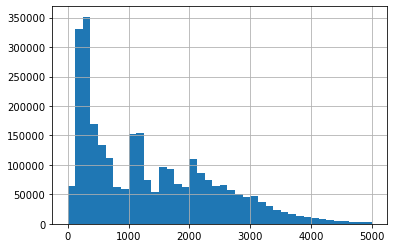

In [93]:
cheque_sums[cheque_sums < 5000].hist(bins=40) # Удалим выбросы с покупками больше чем на 5 000 и посмотрим график

Интересные пики рядом с круглыми числами (1000, 1500, 2000). Но это уже другая история

### Помотрим на кластерный анализ

In [94]:
from sklearn.cluster import KMeans
import numpy as np

In [95]:
np.random.seed(42)

In [96]:
tran_for_clust = tran.merge(nom, on='sku_id')[['cheque_id','price', 'number','litrs', 'sku_group']] 
# представим чек в виде вектора по группам купленных товаров

In [97]:
tran_for_clust = tran_for_clust.eval("S = price*(litrs+number)") # Подсчитаем сумму чека

In [98]:
tran_for_clust.litrs = tran_for_clust.litrs.apply(lambda x: 0 if x == 0 else 1) # Покупал ли клиент топливо

In [99]:
tran_for_clust = tran_for_clust.drop(['price', 'number'], axis = 1) # Убираем лишнее

In [100]:
tran_for_clust = pd.get_dummies(tran_for_clust, columns=['sku_group'])

In [101]:
tran_for_clust = tran_for_clust.groupby('cheque_id').agg('sum') # Собираем так, чтобы 1 строка = один чек

In [102]:
km_clust5 = KMeans(5) 

In [103]:
km_clust5.fit(tran_for_clust.head(100000)) # больше он не тянет

KMeans(n_clusters=5)

In [104]:
pd.DataFrame.from_dict({client_type: km_clust5.cluster_centers_[client_type] for client_type in range(5)},
                       orient='index', columns=tran_for_clust.columns).round(decimals=5)
# Изучим центры кластеров, как наиболее типичные значения кластреров

,litrs,S,sku_group_Автотовары,"sku_group_Автохимия и автокосметика (кроме масел, смазок и СОЖ)",sku_group_Бакалея,sku_group_Вода,sku_group_Гастроном,sku_group_Карты лояльности,sku_group_Кондитерские изделия,sku_group_Кофейные напитки с молоком,...,sku_group_Снеки,sku_group_Соки и сокосодержащие напитки,sku_group_Табачные изделия,sku_group_Тиражная лотерея,sku_group_Топливо,sku_group_Услуги АЗС/АЗК,sku_group_Услуги мойки,sku_group_Уход за автомобилем,"sku_group_Хозяйственные товары, персональный уход",sku_group_Энергетические напитки
0,0.98431,1309.25666,0.01049,0.00625,0.00210,0.12911,0.03368,0.01154,0.12544,0.19119,...,0.03469,0.01541,0.45047,0.00000,0.98431,0.00000,0.00004,0.00928,0.01912,0.10955
1,1.00710,2323.76290,0.00611,0.00491,0.00241,0.12773,0.03517,0.01299,0.13875,0.35163,...,0.04383,0.01517,0.29665,0.00000,1.00710,0.00000,-0.00000,0.01227,0.01763,0.09037
2,0.99929,3543.33344,0.01330,0.00614,0.00171,0.13900,0.03868,0.01199,0.15683,0.50242,...,0.05651,0.01753,0.22220,0.00000,0.99929,0.00000,0.00010,0.01430,0.03153,0.07746
3,0.14237,340.56461,0.00524,0.00372,0.00524,0.15499,0.03867,0.00154,0.15523,0.23467,...,0.04975,0.02111,0.58279,0.00248,0.14237,0.00012,0.00005,0.01118,0.03757,0.14143
4,0.88350,10762.11373,0.02913,0.02913,0.00971,0.12621,0.01942,0.00971,0.03883,0.36893,...,0.01942,0.00000,0.20388,0.00000,0.88350,0.00000,-0.00000,0.00971,0.43689,0.14563


In [105]:
pd.DataFrame.from_dict({client_type: km_clust5.cluster_centers_[client_type] for client_type in range(5)},
                       orient='index', columns=tran_for_clust.columns).round(decimals=5)[[f'sku_group_{i}' 
                                                                                          for i in target_groups]]
# И повнимательнее на таргетные группы

,sku_group_Снеки,"sku_group_Сладкие Уранированные напитки, холодный чай",sku_group_Соки и сокосодержащие напитки,sku_group_Вода,sku_group_Кофейные напитки с молоком,sku_group_Энергетические напитки
0,0.03469,0.08684,0.01541,0.12911,0.19119,0.10955
1,0.04383,0.06632,0.01517,0.12773,0.35163,0.09037
2,0.05651,0.05983,0.01753,0.13900,0.50242,0.07746
3,0.04975,0.12062,0.02111,0.15499,0.23467,0.14143
4,0.01942,0.01942,0.00000,0.12621,0.36893,0.14563


Небольшой отчет по тому, что мы видим:
На самом деле я на черновике перебрал много вариантов, и 5 кластеров показалось мне наиболее интересным и устойчивым делением.
Хоть Алгоритм ближайших соседей чувствителен к масштабу, растяжение по суммам чеков выглядит логично
Результаты, в принципе, легко поддаются интерпритации.
3 кластер - покупатели не водители. Они тратят мало денег, много покупают табачные изделия, воду и сладкие напитки и не особо покупают кофе.
0,1,2 - различные группы водителей с разными экономическими возможностями и предпочтениями. Например, 1 и 2 уважают кофе намного больше, чем 0.
4 кластер - возможно, дальнобойщики, заправляются на большую сумму, пьют кофе или энергетики, много покупают Хозяйственных товаров, персонального ухода (так как подолгу находятся в пути!)

# Пишем рекомендательные системы

Идей несколько, а значит, надо проверить их. Идея следующая - написать несколько рекомендательных систем и затем сравнить их по метрике mean average precision at 20. Я решил написать эти системы на подобии интерфейса sklearn (fit и recommend вместо predict). В перспективе это могло бы стать библиотекой.

Начнем с базового решения, когда мы советуем самые популярные товары. Я решил добавить возможность выбора периода, потому что мы видели на данных, что от времени года популярность продуктов может меняться.

In [106]:
class Popular_Recommender():
    '''Рекомендер. Составляет рекомендацию из 20 товаров в чек на основе самых популярных товаров'''
    def __init__(self, target_values, period = None):
        '''При инициализации обязательно задать значения товаров, которые хотим рекомендовать и можно задать период'''
        self.period = period
        self.target_values = target_values
    
    
    def fit(self, X):
        '''На вход подается объект pd.DataFrame с продажами в транзакционной форме'''
        if self.period is None: #сразу находим топ. Берем с запасом чтобы потом удалить уже купленное клиентом
            self.top = X[X.sku_id.isin(self.target_values)].sku_id.value_counts().head(30).index.to_numpy()
        else:
            self.top = X[X.sku_id.isin(self.target_values) 
                         & (X.date > self.period[0]) & (X.date < self.period[1])].sku_id.value_counts().head(30).index.to_numpy()
    
    
    def recommend(self, X, drop_bought = True, verbose = True):
        '''Основной метод класса. На вход подается объект pd.DataFrame с продажами в транзакционной форме
        drop_bought: bool, default=True
        Если drop_bought = True, то мы удаляем уже купленные клиентом товары. Так он работает медленнее, но не предлагает 
        уже взятые товары.
        
        verbose: bool, default=True
        Выводит техническую информацию о готовности рекомендации. Для оценки времени ожидания'''
        if drop_bought:
            self.ans = {}
            # bought_skus - список уже купленных товаров
            self.bought_skus = np.split(X.sort_values('cheque_id').sku_id.to_numpy(),X.groupby('cheque_id', 
                                                                     as_index=False).agg('count').sku_id.to_numpy().cumsum())[:-1]
            # количество чеков
            self.full = len(self.bought_skus) 
            #Проходимся по всем чекам в форме (Чек, уже купленные товары)
            for counter, (cheque, bought_sku) in enumerate(zip(sorted(X.cheque_id.unique()), self.bought_skus)):
                self.ans[cheque] = self.top[~np.in1d(self.top, bought_sku)][:20] # Удаляем купленные товары из рекомендации
                if counter%500 == 0:
                    print(f'{counter} \ {self.full}',  end='\r') # Выводит информацию о выполнении
        else:
            self.ans = {c: self.top[:20] for c in X.cheque_id.unique()}
        return self.ans

In [107]:
rec1 = Popular_Recommender(target_sku)

In [108]:
%time rec1.fit(tran) # Время обучения

Wall time: 2.45 s


In [109]:
%time len(rec1.recommend(tran[tran.cheque_id.isin([i for i in range(100000)])]))
# Проверка времени и корректности работы: на 100 000 чеков должно выдать 100 000 рекомендаций

Wall time: 7.96 s


100000

Следующая рекомендательная система к идее популярности добавляет идею о постоянстве покупательского выбора

In [110]:
class Client_Recommender():
    '''Рекомендер. Составляет рекомендацию из 20 товаров в чек на основе предпочтений клиентов, 
    уже покупавших в магазине и популярных товаров'''
    def __init__(self, target_values):
        '''При инициализации обязательно задать значения товаров, которые хотим рекомендовать и можно задать период'''
        self.target_values = target_values
    
    
    def fit(self, X):
        '''На вход подается объект pd.DataFrame с продажами в транзакционной форме'''
        self.top = X[X.sku_id.isin(self.target_values)].sku_id.value_counts().head(30).index.to_numpy() # топ товаров
        #Группируем клиентов и их покупки и записываем в форме (клиент, покупка)
        self.clients_and_sku = X[(X.sku_id.isin(self.target_values))&(X.client_id>-1)][['sku_id', 'client_id', 'cheque_id']]\
        .groupby(['client_id','sku_id']).agg('count').sort_values('cheque_id').index.to_numpy() 
        self.client_dict = {} # Словарь с клиентами и их покупками за все время
        for client, sku in self.clients_and_sku:
            if client not in self.client_dict:
                self.client_dict[int(client)]  = [sku]
        else:
            self.client_dict[int(client)].append(sku)
        self.clients = list(self.client_dict.keys()) # Список всех известных нам клиентов 
        
            
    def recommend(self, X, drop_bought = True, verbose = True):
        '''Основной метод класса. На вход подается объект pd.DataFrame с продажами в транзакционной форме
        drop_bought: bool, default=True
        Если drop_bought = True, то мы удаляем уже купленные клиентом товары. Так он работает медленнее, но не предлагает 
        уже взятые товары.
        
        verbose: bool, default=True
        Выводит техническую информацию о готовности рекомендации. Для оценки времени ожидания'''
        self.limit = 30 if drop_bought else 20
        self.bought_skus = np.split(X.sort_values('cheque_id').sku_id.to_numpy(),X.groupby('cheque_id', 
                                                                 as_index=False).agg('count').sku_id.to_numpy().cumsum())[:-1]
        # Для неизвестных клиентов предлагаем просто популярные товары
        self.ans = {c: self.top[:self.limit] for c in X[-(X.client_id.isin(self.clients))].cheque_id.unique()}
        self.cheque_id_and_client = X[X.client_id.isin(self.clients)][['cheque_id', 'client_id']].groupby([
            'cheque_id', 'client_id']).agg('count').index.to_numpy() # Пары (Чек, клиент)
        self.full = len(self.cheque_id_and_client)
        for counter, (cheque, client) in enumerate(self.cheque_id_and_client):
            self.ans[int(cheque)] = np.array(list(dict.fromkeys(np.append(self.client_dict[int(client)], self.top))))[:self.limit]
            if counter%500 == 0 and verbose:
                print(f'{counter} \ {self.full}',  end='\r') # Техническая информация 
        if drop_bought: # Удаляем покупки
            self.full = len(self.bought_skus)
            for counter, (cheque, bought_sku) in enumerate(zip(sorted(X.cheque_id.unique()), self.bought_skus)):
                self.ans[cheque] = self.ans[cheque][~np.in1d(self.ans[cheque], bought_sku)][:20]
                if counter%500 == 0 and verbose:
                    print(f'{counter} \ {self.full}',  end='\r') # Техническая информация
        return self.ans

In [111]:
rec2 = Client_Recommender(target_sku)

In [112]:
%time rec2.fit(tran) # Время обучения

Wall time: 4.38 s


In [113]:
%time len(rec1.recommend(tran[tran.cheque_id.isin([i for i in range(100000)])]))
# Проверка времени и корректности работы: на 100 000 чеков должно выдать 100 000 рекомендаций

Wall time: 12.9 s


100000

Следующая рекомендательная система основана на идеях кластерного анализа. Мы попытаемся угадать тип клиента, и составить список товаров для каждого типа. А на месте предлагать уже сформированный список

In [114]:
class Cluster_Recommender():
    '''Рекомендер. Составляет рекомендацию из 20 товаров в чек на основе групп уже купленных товаров'''
    def __init__(self, target_groups, nom, n_clusters = 5, **kwargs):
        '''При инициализации обязательно задать группы товаров, которые хотим рекомендовать и таблицу нуменклатуры'''
        from sklearn.cluster import KMeans # Импортируем алгортим кластеризации для избежания ошибок
        self_n_clusters = n_clusters
        self.nom = nom
        self.target_groups = target_groups
        self.target_values = {group: nom[nom.sku_group == group].sku_id.to_numpy() for group in target_groups}
        self.cluster = KMeans(n_clusters, **kwargs)
        
    def fit(self, X, limit = 10000):
        '''На вход подается объект pd.DataFrame с продажами в транзакционной форме
        limit: int,  default=True
        Ограничивает данные, потому что sklern плохо справляется с полной таблицой. + Помогает избежать MemoryError'''
        self.saved_X = X[X.cheque_id.isin(np.random.choice(X.cheque_id.unique(), limit))]
        # Создаем топы по группам
        self.tops_of_groups = {group: X[X.sku_id.isin(self.target_values[group])]\
                               .sku_id.value_counts().head(30).index.to_numpy() for group in self.target_groups}
        # Предобрабатываем данные для кластеризации
        self.X_for_clust = self.saved_X.copy() # Нам понадобится необработанная таблица
        self.X_for_clust = self.X_for_clust.merge(self.nom, on='sku_id')[['cheque_id','price', 'number','litrs', 'sku_group']]
        self.X_for_clust = self.X_for_clust.eval("S = price*(litrs+number)")
        self.X_for_clust.litrs = self.X_for_clust.litrs.apply(lambda x: 0 if x == 0 else 1)
        self.X_for_clust = self.X_for_clust.drop(['price', 'number'], axis = 1)
        # как оказалось get_dummies работает намного лучше OneHotEncoder от sklearn
        self.X_for_clust = pd.get_dummies(self.X_for_clust, columns=['sku_group'])
        self.X_for_clust = self.X_for_clust.groupby('cheque_id').agg('sum')
        self.columns = self.X_for_clust.columns
        self.cluster.fit(self.X_for_clust)
        #Таблица с типичными клиентами
        self.typical_clients_table = pd.DataFrame.from_dict({client_type: self.cluster\
                                                             .cluster_centers_[client_type] for client_type in range(5)},
                       orient='index', columns=self.columns).round(decimals=5)[[f'sku_group_{i}' for i in self.target_groups]]
        self.type_recommend_dict = {} # Словарь с рекомендациями
        # В цикле проходимся по типам клиентав и словарями с рекомендациями и формируем словарь с рекомендациями групп
        for client_type, rec_dict in self.typical_clients_table.apply(lambda x: np.round(30*x/x.sum())\
                                                      .astype(int), raw = True, axis=1).to_dict('index').items():
            self.type_recommend_dict[client_type] = sorted([self.tops_of_groups[group[10:]][:num] 
                                               for group, num in rec_dict.items()], key=len, reverse=True)
            self.type_recommend_dict[client_type] = [i for j in self.type_recommend_dict[client_type] for i in j]
            
    def recommend(self, X, verbose = True):
        '''Основной метод класса. На вход подается объект pd.DataFrame с продажами в транзакционной форме
        verbose: bool, default=True
        Выводит техническую информацию о готовности рекомендации. Для оценки времени ожидания'''
    
        self.cheques_to_recommend = sorted(X.cheque_id.unique()) # Записываем все чеки
        # Купленные товары
        self.bought_skus = np.split(X.sort_values('cheque_id').sku_id.to_numpy(), X.groupby('cheque_id', 
                                                                 as_index=False).agg('count').sku_id.to_numpy().cumsum())[:-1]
        # подсоединяем таблицу с транзакциями для предсказания к таблице из обучения и обрабатываем как в обучении
        # Из-за особенностей pandas в таблицах это работает быстрее и эффективнее чем OneHotEncoder
        self.X_for_clust = self.saved_X.append(X)
        self.X_for_clust = self.X_for_clust.merge(self.nom, on='sku_id')[['cheque_id','price', 'number','litrs', 'sku_group']]
        self.X_for_clust = self.X_for_clust.eval("S = price*(litrs+number)")
        self.X_for_clust.litrs = self.X_for_clust.litrs.apply(lambda x: 0 if x == 0 else 1)
        self.X_for_clust = self.X_for_clust.drop(['price', 'number'], axis = 1)
        self.X_for_clust = pd.get_dummies(self.X_for_clust, columns=['sku_group'])
        self.X_for_clust = self.X_for_clust.groupby('cheque_id').agg('sum')
        self.X_for_clust = self.X_for_clust.loc[self.cheques_to_recommend, self.columns] #оставляем только данные для рекомендации
        self.ans = {}
        # для каждого чека в цикле делаем рекомендацию и удаляем уже купленное
        self.lenn = len(self.bought_skus)
        for counter, (predicted_label, cheque, bought_sku) in enumerate(zip(self.cluster.predict(self.X_for_clust), 
                                                                            self.cheques_to_recommend, self.bought_skus)):
            self.ans[cheque] = np.array(self.type_recommend_dict[predicted_label])
            self.ans[cheque] = self.ans[cheque][~np.in1d(self.ans[cheque], bought_sku)][:20]
            if counter%500 == 0 and verbose:
                print(f'{counter} / {self.lenn}',  end='\r') # техническая информация о времени выполнения
        return self.ans        

In [115]:
rec3 = Cluster_Recommender(target_groups, nom)

In [116]:
%time rec3.fit(tran)

Wall time: 4.78 s


In [117]:
%time len(rec1.recommend(tran[tran.cheque_id.isin([i for i in range(100000)])]))
# Проверка времени и корректности работы: на 100 000 чеков должно выдать 100 000 рекомендаций

Wall time: 8.15 s


100000

# Сравниваем рекомендательные системы

Я решил немного изменить метрику. Так как я хочу выкинуть из каждого чека по 1 товару, который надо рекомендовать и постараться угадать по этому чеку выкинутый товар, то Average precision at 20  для каждого чека будет не больше 1 (если выкинутый товар на 1 месте, то 1, если на 2, то 1/2. Поэтому коэффициент 1/20 будет только мешать интерпретировать результаты. Я решил считать метрику без него.

In [118]:
val_tran = targ_tran[targ_tran.cheque_id.isin(np.random.choice(targ_tran.cheque_id.unique(), 150000))]
# Отложим выборку для предсказания

In [119]:
train_tran = tran.drop(val_tran.index, axis=0) # выкенем из обучающей выборки валидационную

In [120]:
train_tran.shape, val_tran.shape, tran.shape

((6422489, 8), (377858, 8), (6800347, 8))

In [121]:
6544716 + 255631 # Проверка

6800347

In [122]:
val_tran.cheque_id.value_counts() # Смотрим количество чеков

885719     20
840169     19
1669066    17
1909437    17
1425283    16
           ..
613207      1
571231      1
123207      1
110973      1
670812      1
Name: cheque_id, Length: 143196, dtype: int64

Есть чеки всего на 1 товар. К сожалению, они пропадут при удалении, но их не так много

In [123]:
droped_tran = val_tran[val_tran.sku_id.isin(target_sku)][['cheque_id', 'sku_id']]\
.groupby('cheque_id').agg('first').sku_id.to_dict() # Запишем выкинутые пары в словарь в виде чек:товар

In [124]:
len(droped_tran) # должно совпасть с количеством чеков

143196

In [125]:
val_tran = pd.concat([val_tran, val_tran[val_tran.sku_id.isin(target_sku)][['cheque_id', 'sku_id']]\
           .groupby('cheque_id', as_index=False).agg('first')]).drop_duplicates(subset=['sku_id', 'cheque_id'], keep=False)
# Удаляем выкинутые транзакции из валидационной выборки

In [126]:
val_tran.cheque_id.value_counts() # Смотрим, сколько мы потеряли 

885719     19
840169     18
1669066    16
1425283    15
1182483    15
           ..
676827      1
3298268     1
938973      1
2773982     1
2916905     1
Name: cheque_id, Length: 141532, dtype: int64

In [127]:
96945 - 95819 # Потеряли не так уж и много

1126

Приступим к сравнению

In [128]:
rec1 = Popular_Recommender(target_sku)

In [129]:
rec1.fit(train_tran)

In [130]:
rec1_dict = rec1.recommend(val_tran) # Сохраним рекомендации

In [131]:
#Найдем значение Average precision at 20, запишем в result и найдем среднее по всем чекам в валидационной выборке
result = np.array([])
for i in rec1_dict:
    result = np.append(result, 1/(np.where(rec1_dict[i]==droped_tran[i])[0] + 1))
    
result.sum()/len(rec1_dict)

0.1419055904430231

In [132]:
# Из интереса посмотрим, насколько хуже работает система, если не выкидывать купленные товары
rec1_5_dict = rec1.recommend(val_tran, drop_bought=False)

In [133]:
result = np.array([])
for i in rec1_5_dict:
    result = np.append(result, 1/(np.where(rec1_5_dict[i]==droped_tran[i])[0] + 1))
    
result.sum()/len(rec1_5_dict)

0.1414049236842211

In [134]:
# Система на основе данных о клиентах
rec2 = Client_Recommender(target_sku)

In [135]:
rec2.fit(train_tran)

In [136]:
rec2_dict = rec2.recommend(val_tran)

In [137]:
result = np.array([])
for i in rec2_dict:
    result = np.append(result, 1/(np.where(rec2_dict[i]==droped_tran[i])[0] + 1))
    
result.sum()/len(rec2_dict)

0.1538051633254091

Результат стал заметно лучше!

In [138]:
# Система на основе класстерного анализа 
rec3 = Cluster_Recommender(target_groups, nom)

In [139]:
rec3.fit(train_tran)

In [140]:
rec3_dict = rec3.recommend(val_tran)

In [141]:
result = np.array([])
for i in rec3_dict:
    result = np.append(result, 1/(np.where(rec3_dict[i]==droped_tran[i])[0] + 1))
    
result.sum()/len(rec3_dict)

0.09930307978708038

Результат, к сожалению, стал хуже, но не сильно! Возможно, данный алгоритм можно усовершенствовать

Подводим итоги: Лучше всех показала себя рекомендательная система на основе данных о клиентах.
В среднем угаданный товар стоит на 6-7 месте (1\6 < MAP(rec2) < 1/7). Рекомендательная система на основе кластерного анализа в среднем угадывает значение на 8 месте, что в целом тоже неплохой результат! По результатам этих вычислений, я принял решение составить рекомендации на основе Client_Recommender

# Обработка данных и продакшен

Теперь надо обработать данные и сделать на них прогноз. Удобно сделать для этого конвеер, который сначала обрабатывает, а затем делает прогноз. Такую систему можно непосредственно внедрять в продакшен

In [142]:
tran_for_sub = pd.read_parquet('transactions-for_submission.parquet')

In [143]:
# Напишем функцию для обработки данных (хорошо, что нам известны все преобразования)
def transform(X):
    '''Трансформирует pandas.DataFrame объект чтобы по нему можно было делать предсказания'''
    X = X.copy() #Чтобы не менялся исходный объект
    X.sku_id = X.sku_id.astype(object)
    X.cheque_id = X.cheque_id.astype(object)
    X.shop_id = X.shop_id.astype(object)
    X.loc[X.client_id.isnull(), "client_id"] = -1
    X.client_id = X.client_id.astype(object)
    X.number = (X.number/0.000452).round(decimals=3)
    X.litrs = (30*(X.litrs-0.104183)/0.02986).round(decimals=3)
    X = X.drop(X[X.litrs < 0].index)
    X.price = X.price*19000
    return X

In [144]:
transform(tran_for_sub) # Посмотрим, что получилось

,sku_id,price,number,cheque_id,litrs,client_id,shop_id,date
0,1158,43.771165,0.000,734259,38.101,223748,42,2171-08-01 09:00:00
1,555,173.524885,1.001,734260,0.000,-1,42,2171-08-01 09:00:00
2,555,173.524885,1.001,734260,0.000,-1,42,2171-08-01 09:00:00
3,1158,43.771165,0.000,734264,33.981,-1,42,2171-08-01 09:00:00
4,1534,53.617240,1.001,734266,0.000,-1,42,2171-08-01 09:00:00
...,...,...,...,...,...,...,...,...
554725,2999,150.128271,1.001,3406741,0.000,-1,107,2171-09-01 09:00:00
554726,1157,50.936378,0.000,3406743,92.322,340354,107,2171-09-01 09:00:00
554727,1158,44.697281,0.000,3406744,60.002,345307,107,2171-09-01 09:00:00
554728,1158,44.697281,0.000,3406745,21.811,-1,107,2171-09-01 09:00:00


In [145]:
# Напишем полный конвеер
def Pipeline(transformer, recommendor):
    return lambda X: recommendor.recommend(transformer(X))

In [146]:
# Обучим наш рекомендатор на всех данных
rec_final = Client_Recommender(target_sku)
rec_final.fit(tran)

In [147]:
final_pipeline = Pipeline(transform, rec_final)

In [148]:
sub_dict = final_pipeline(tran_for_sub)

In [149]:
len(sub_dict) # Проверим, все ли в порядке

315228

In [150]:
tran_for_sub.cheque_id.value_counts() # Проверим, все ли в порядке

3391059    41
2521683    32
1058916    31
2907515    31
2905380    30
           ..
2730518     1
2734612     1
1657354     1
1659401     1
1056772     1
Name: cheque_id, Length: 315228, dtype: int64

Все в порядке. Количество предсказаний равно количеству чеков в tran_for_sub. Осталось перевести все это дело в parquet

In [151]:
ans = []
c = 0
for cheque in sub_dict:
    c += 1
    for position, sku in enumerate(sub_dict[cheque]):
        ans.append([cheque, sku, position+1])
        if c%500 == 0:
            print(c, end = '\r')

In [152]:
final_submission = pd.DataFrame(ans, columns=['cheque_id', 'sku_id', 'position'])

In [153]:
final_submission

,cheque_id,sku_id,position
0,734260,3329,1
1,734260,3324,2
2,734260,3334,3
3,734260,1551,4
4,734260,2673,5
...,...,...,...
6304555,3406748,580,16
6304556,3406748,403,17
6304557,3406748,817,18
6304558,3406748,229,19


In [154]:
315228*20

6304560

In [155]:
final_submission.to_parquet('submission-Trubin.parquet')